# Graph of actors

In [1]:
import networkx as nx
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import json

## Load preprocessed data

In [2]:
df_movies = pd.read_pickle('../data/generated/preprocessed/movies.pkl')

In [3]:
df_actors = pd.read_pickle('../data/generated/preprocessed/characters.pkl')

In [4]:
merge_info = pd.merge(df_actors, df_movies, on=["wiki_id"])
df_actors['local_actor']= merge_info['actor_nationnality']==merge_info['movie_countries']
df_actors[df_actors.actor_nationnality.isnull() == False]

groupby =df_actors.groupby('wiki_id')['local_actor'].agg(['mean'])
df_actors['local_rate']= df_actors['wiki_id'].apply(lambda x: groupby.loc[x]['mean'])
df_actors


,wiki_id,fb_movie_id,release,character_name,actor_birth,actor_gender,actor_height,ethnicity,actor_name,actor_age,fb_char_id,fb_actor_id,actor_nationnality,local_actor,local_rate
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/03wcfv7,United States of America,True,0.470588
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,NaN,Natasha Henstridge,27.0,/m/0jys3m,/m/0346l4,Canada,False,0.470588
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,NaN,Ice Cube,32.0,/m/0jys3g,/m/01vw26l,NaN,False,0.470588
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/034hyc,United Kingdom,False,0.470588
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/01y9xg,United States of America,True,0.470588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0b_vcv,NaN,False,0.133333
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0bx7_j,NaN,False,0.133333
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,English people,David Hemmings,15.0,/m/0g8ngmc,/m/022g44,England,False,0.000000
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,/m/0g8ngmm,NaN,False,0.000000


In [5]:
rate_table = pd.merge(df_movies[['wiki_id','movie_release_year']], df_actors[['wiki_id','local_rate']].drop_duplicates(subset=['wiki_id']) , on='wiki_id')


In [9]:
stats_by_year = rate_table.groupby(rate_table['movie_release_year']).apply(lambda x: pd.Series({
        'average_local_rate': x['local_rate'].mean(),
        'std_dev_local_rate': x['local_rate'].std()
    }))
stats_by_year = stats_by_year[stats_by_year.std_dev_local_rate.isnull() == False]
stats_by_year = stats_by_year[stats_by_year.index > 1915]
stats_by_year = stats_by_year[stats_by_year.index < 2013]
stats_by_year

,average_local_rate,std_dev_local_rate
movie_release_year,,
1916,0.679696,0.405603
1917,0.673153,0.427341
1918,0.661238,0.419232
1919,0.675171,0.418630
1920,0.570847,0.452976
...,...,...
2008,0.201180,0.286500
2009,0.202944,0.279226
2010,0.197253,0.280799


Text(0, 0.5, 'Local Actor Rate')

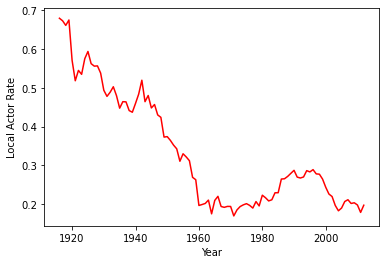

In [10]:
#plt.fill_between(stats_by_year.index, stats_by_year.average_local_rate - stats_by_year.std_dev_local_rate,
 #                stats_by_year.average_local_rate + stats_by_year.std_dev_local_rate, alpha = 0.5, color = 'orange')
plt.plot(stats_by_year.average_local_rate, color = 'red')

plt.xlabel('Year')
plt.ylabel('Local Actor Rate')